In [1]:
# Functions:
# 1) Reads degree centrality values form csv, 
# 2) displays histograms and 
# 3) analyses power law fit
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
import time
import statsmodels.api as sm
from fun.fun import *
from math import comb

c:\Users\stirl\miniconda3\envs\network_env\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Variables
edges_fn = '../data/edges.csv'
edges_prq = "../data/edges.parquet"
degree_fn = '../data/degree_centralities.csv'
dataset_fn = "../dataset/TweetsCOV19.tsv"

In [3]:
# -> IN : PARQUET Read edges from parquet to dataframe
print("reading edges ... ", end='')
start = time.time()
df = dd.read_parquet(edges_prq)
df[['source', 'target']] = df[['source', 'target']].astype('int32')
end = time.time()
print("read {:_} lines (took {:.1f}s)".format(len(df), (end-start)))
print(df.dtypes)
df.head()

reading edges ... read 684_732_453 lines (took 0.2s)
source    int32
target    int32
dtype: object


,source,target
0,13,103151
1,13,214293
2,103151,214293
3,13,138731
4,13,42023


In [4]:
# -> IN : Read list of nodes
nodes = pd.read_csv('../data/node_ids.csv', index_col='index')
print("Number of nodes: {:_}".format(len(nodes)))

Number of nodes: 410_885


In [5]:
# -> IN : Read degree centrality values
dc = pd.read_csv(degree_fn, index_col='node')
dc

,degree
node,
0,253
1,138
2,102
3,349
4,42
...,...
410880,458
410881,1487
410882,2


In [6]:
# Get min, max, etc
values = dc['degree']
steps = 100
v_min, v_max = min(values), max(values)
print("DEGREE:")
print("min: {:,}".format(v_min))
print("max: {:,}".format(v_max))
print("mean: {:,}".format(int(np.mean(values))))

DEGREE:
min: 1
max: 67,496
mean: 3,332


In [7]:
# Compute histograms
v_step = (v_max-v_min)/steps
bins = np.arange(v_min, v_max+v_step, (v_max-v_min)/steps)
log_bins = np.logspace(np.log10(v_min), np.log10(v_max), steps+1)

v_hist =           [ len([ x for x in values if (bins[i] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =       [ len([ x for x in values if (bins[0] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_log_hist =       [ len([ x for x in values if (log_bins[i] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
v_log_hist_cum =   [ len([ x for x in values if (log_bins[0] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
#at_end = len([x for x in values if x == v_max])

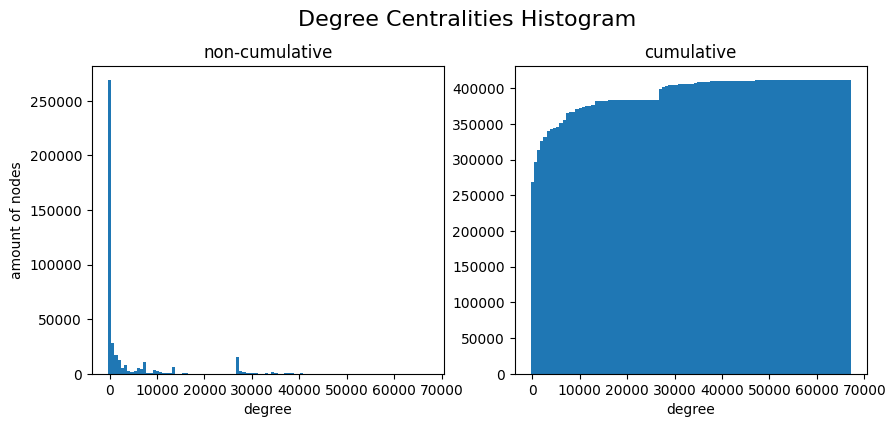

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
fig.suptitle('Degree Centralities Histogram', fontsize=16, y=1.02)
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
ax[0].set_title("non-cumulative")
ax[1].set_title("cumulative")
ax[0].set_ylabel("amount of nodes")
ax[0].set_xlabel("degree")
ax[1].set_xlabel("degree")
plt.show()

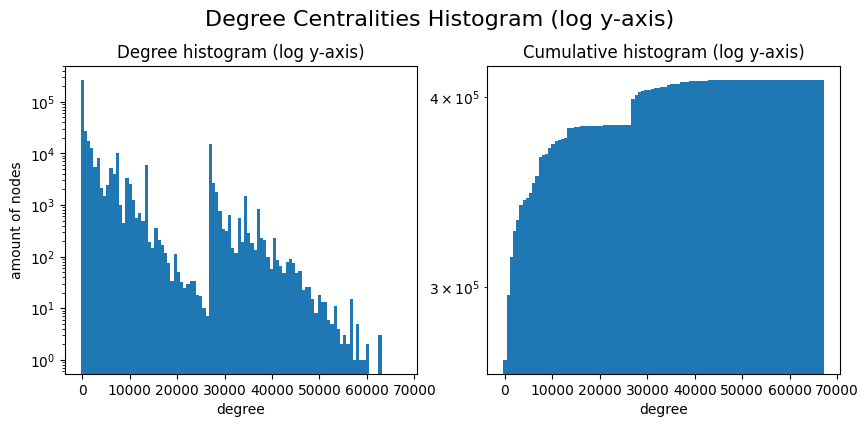

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
fig.suptitle('Degree Centralities Histogram (log y-axis)', fontsize=16, y=1.02)
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_title("Degree histogram (log y-axis)")
ax[1].set_title("Cumulative histogram (log y-axis)")
ax[0].set_ylabel("amount of nodes")
ax[0].set_xlabel("degree")
ax[1].set_xlabel("degree")
plt.show()

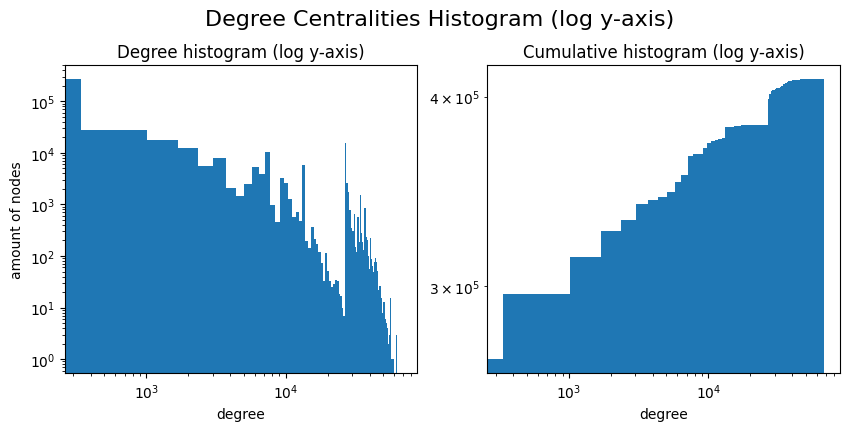

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
fig.suptitle('Degree Centralities Histogram (log y-axis)', fontsize=16, y=1.02)
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_title("Degree histogram (log y-axis)")
ax[1].set_title("Cumulative histogram (log y-axis)")
ax[0].set_ylabel("amount of nodes")
ax[0].set_xlabel("degree")
ax[1].set_xlabel("degree")
plt.show()

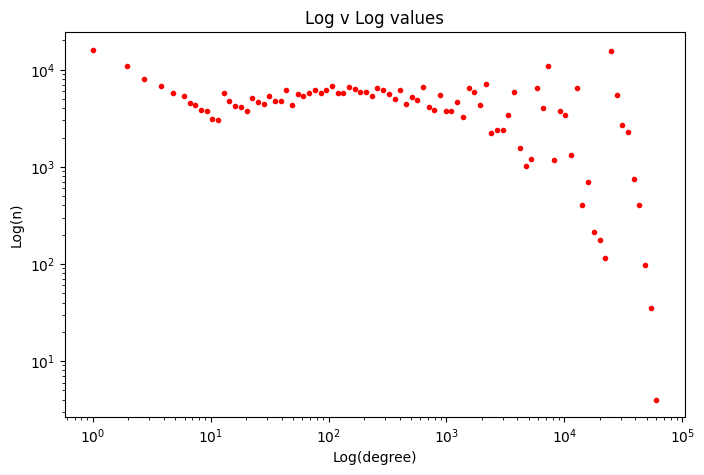

In [14]:
#fig, ax = plt.subplots(ncols=1, figsize=(8,5))
plt.figure(figsize=(8,5))
plt.title('Log v Log values')
plt.loglog(log_bins[:steps], v_log_hist, 'r.')
#plt.grid()
plt.ylabel('Log(n)')
plt.xlabel('Log(degree)')
plt.show()

In [ ]:
from scipy.stats import powerlaw
a = 0.559
values = (powerlaw.rvs(a, size=1000) + 1)*5000

v_min, v_max = min(values), max(values)
v_step = (v_max-v_min)/steps

bins = np.arange(v_min, v_max+v_step, (v_max-v_min)/steps)
log_bins = np.logspace(np.log10(v_min), np.log10(v_max), steps+1)

v_hist =        [ len([ x for x in values if (bins[i] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =    [ len([ x for x in values if (bins[0] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_log_hist =   [ len([ x for x in values if (log_bins[i] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =   [ len([ x for x in values if (log_bins[0] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]

""" fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].bar(bins[:steps], v_ist, width=v_step)
ax[1].bar(bins[:steps], v_ist_cum, width=v_step)
plt.show() """

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].loglog(log_bins[:steps], v_log_hist, 'r.')
ax[1].plot(np.log(log_bins[:steps]), np.log(v_log_hist), 'r.')
#ax[1].set_yscale('log')
#ax[1].loglog(bins[:steps], v_ist, 'g.')
plt.show()

In [13]:
# -> IN : Load tweets dataframe
tw = get_filtered_tweets_dataframe(dataset_fn)
print("Loaded {:_} tweets".format(len(tw)))
tw

Importing dataset from tsv file ...read 8_077_794 lines (took 111.0s)
Converting timestamp column
Filtering desired columns and between desired dates ... 8_077_794 rows in dataframe
Parsing hashtags and positive/negative sentiments
filtering for tweets that contain hashtags ... 8_077_794 rows in dataframe
Loaded 462_901 tweets


,Username,Timestamp,Hashtags,Sentiment_pos,Sentiment_neg
Tweet Id,,,,,
1200928806757752833,83c182d0ee195dc692900d7ff7328171,2019-12-01 00:05:14+00:00,"[rgvwx, rgv, txwx, spi]",1,-2
1200931476642115586,73c3e83574f1eb0a5201c71cf46c732c,2019-12-01 00:15:50+00:00,[KeDezembaBoss],2,-4
1200941770835521536,4efca14ff68aa1edd9aea0c78c615ef2,2019-12-01 00:56:45+00:00,"[fame., FreeBritney]",2,-2
1200948819015454721,a53fd620b4178d04a1d2c4e37e85e0ae,2019-12-01 01:24:45+00:00,[FakeNews],1,-2
1200955132944560135,215a5a37e161f7ceaa0c532e73f62c40,2019-12-01 01:49:51+00:00,[KabukiPolitics],1,-1
...,...,...,...,...,...
1233891411109597185,aac81411d4a07a67c96b72655974ed12,2020-02-29 23:06:51+00:00,"[ai, ml, dl]",2,-1
1233896872961552384,4df9baa19ac46918148219d1090740e0,2020-02-29 23:28:33+00:00,"[SKHwy17:, SKHwy3,]",1,-1
1233898288413388807,a19f22a61cd4250367ef67fe2e229f77,2020-02-29 23:34:11+00:00,"[ThinkBIGSundayWithMarsha, SundayThoughts, Sun...",3,-1


In [14]:
# Get number of hashtags for each tweet
hashtags = {}
total, i = len(tw), 0
for _, row in tw.iterrows():
    for ht in row['Hashtags']:
        hashtags[ht] = hashtags.get(ht, 0) + 1
    i, perc = track_progress(total, i)
    #if perc >= 5: break
print("\nDone")

 progress: 462_901/462_901 (100.00000%)

Done


In [15]:
# Sort keys by frequency and filter out hashtags with 1 associated tweet
keys_sorted = sorted(hashtags.keys(), reverse=True, key=lambda x: hashtags[x])
print("Hashtags used: {:_}".format(len(keys_sorted)))
keys_sorted = [x for x in keys_sorted if hashtags[x] > 1]
print("Hashtags with more than 1 tweet: {:_}".format(len(keys_sorted)))

Hashtags used: 292_264
Hashtags with more than 1 tweet: 81_931


In [16]:
# Get frequency and min_edges for top n hashtags by uses
top_hts = keys_sorted[:1]
ht_freq = np.array([ hashtags[ht] for ht in top_hts ])
ht_minedges = np.array([ comb(f,2) for f in ht_freq ])
print(ht_freq)
print(ht_minedges)

[27570]
[380038665]


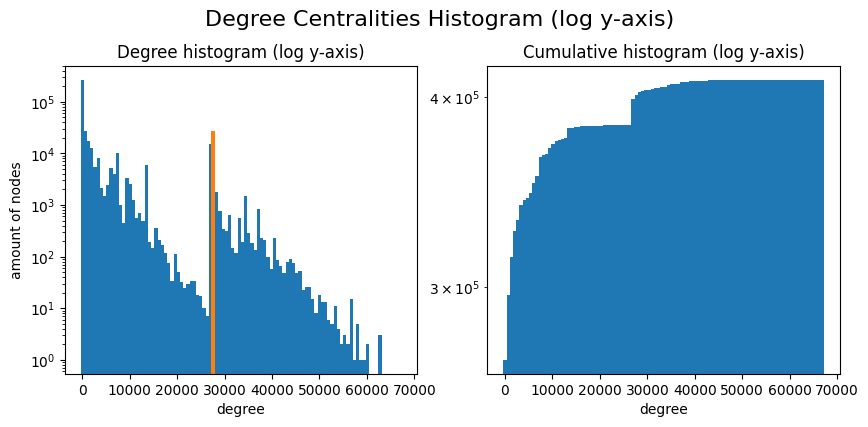

In [18]:
# Add hashtags to histogram
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
fig.suptitle('Degree Centralities Histogram (log y-axis)', fontsize=16, y=1.02)
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[0].bar(ht_freq, ht_freq, width=v_step)
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
sc = 0.0001
#ax[1].bar(ht_freq, ht_minedges*sc, width=v_step)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_title("Degree histogram (log y-axis)")
ax[1].set_title("Cumulative histogram (log y-axis)")
ax[0].set_ylabel("amount of nodes")
ax[0].set_xlabel("degree")
ax[1].set_xlabel("degree")
plt.show()